This notebook contains derivation of BCs, IC and g for example based on

Antonietti, P., & Quarteroni, A. (2013). Numerical performance of discontinuous and stabilized continuous Galerkin methods for convection–diffusion problems. Numerical Methods for Hyperbolic Equations, 75–85. https://doi.org/10.1201/b14172-9

### Solution

In [2]:
var("x_1, x_2, t, u, eps")
# solution is
u(x_1, x_2) = x_1 + x_2 - x_1*x_2 + (exp(-1/eps) - exp(-(1-x_1)*(1-x_2)/eps))/(1 - exp(-1/eps))
u

(x_1, x_2) |--> -x_1*x_2 + x_1 + x_2 + (e^(-(x_1 - 1)*(x_2 - 1)/eps) - e^(-1/eps))/(e^(-1/eps) - 1)

In [4]:
latex(u)

\left( x_{1}, x_{2} \right) \ {\mapsto} \ -x_{1} x_{2} + x_{1} + x_{2} + \frac{e^{\left(-\frac{{\left(x_{1} - 1\right)} {\left(x_{2} - 1\right)}}{\mathit{eps}}\right)} - e^{\left(-\frac{1}{\mathit{eps}}\right)}}{e^{\left(-\frac{1}{\mathit{eps}}\right)} - 1}

$$
\left( x_{1}, x_{2} \right) \ {\mapsto} \ -x_{1} x_{2} + x_{1} + x_{2} + \frac{e^{\left(-\frac{{\left(x_{1} - 1\right)} {\left(x_{2} - 1\right)}}{\mathit{eps}}\right)} - e^{\left(-\frac{1}{\mathit{eps}}\right)}}{e^{\left(-\frac{1}{\mathit{eps}}\right)} - 1}
$$

In [6]:
du_1 = diff(u, x_1)
du_1

(x_1, x_2) |--> -x_2 - (x_2 - 1)*e^(-(x_1 - 1)*(x_2 - 1)/eps)/(eps*(e^(-1/eps) - 1)) + 1

In [7]:
du_2 = diff(u, x_2)
du_2

(x_1, x_2) |--> -x_1 - (x_1 - 1)*e^(-(x_1 - 1)*(x_2 - 1)/eps)/(eps*(e^(-1/eps) - 1)) + 1

### Initial condition

In [8]:
u(t=0)

-x_1*x_2 + x_1 + x_2 + (e^(-(x_1 - 1)*(x_2 - 1)/eps) - e^(-1/eps))/(e^(-1/eps) - 1)

### Boundary conditions

In [9]:
# boundaries
top = 1
left = 0; right = 1
bottom = 0

In [10]:
# left
u(x_1 = left)

x_2 + (e^((x_2 - 1)/eps) - e^(-1/eps))/(e^(-1/eps) - 1)

In [11]:
# left du
(du_1(x_1=left), du_2(x_1=left))

(-x_2 - (x_2 - 1)*e^((x_2 - 1)/eps)/(eps*(e^(-1/eps) - 1)) + 1,
 e^((x_2 - 1)/eps)/(eps*(e^(-1/eps) - 1)) + 1)

In [12]:
# right
u(x_1 = right)

0

In [13]:
# right du
(du_1(x_1=right), du_2(x_1=right))

(-x_2 - (x_2 - 1)/(eps*(e^(-1/eps) - 1)) + 1, 0)

In [14]:
# bottom
u(x_2 = bottom)

x_1 + (e^((x_1 - 1)/eps) - e^(-1/eps))/(e^(-1/eps) - 1)

In [15]:
# bottom du
(du_1(x_2=bottom), du_2(x_2=bottom))

(e^((x_1 - 1)/eps)/(eps*(e^(-1/eps) - 1)) + 1,
 -x_1 - (x_1 - 1)*e^((x_1 - 1)/eps)/(eps*(e^(-1/eps) - 1)) + 1)

In [16]:
# top
u(x_2 = top)

0

In [17]:
# top du
(du_1(x_2=top), du_2(x_2=top))

(0, -x_1 - (x_1 - 1)/(eps*(e^(-1/eps) - 1)) + 1)

### Right hand side $g$

In [18]:
diff(u, t)

(x_1, x_2) |--> 0

In [19]:
diff(u, x_1)

(x_1, x_2) |--> -x_2 - (x_2 - 1)*e^(-(x_1 - 1)*(x_2 - 1)/eps)/(eps*(e^(-1/eps) - 1)) + 1

In [20]:
diff(u, x_1, 2)

(x_1, x_2) |--> (x_2 - 1)^2*e^(-(x_1 - 1)*(x_2 - 1)/eps)/(eps^2*(e^(-1/eps) - 1))

In [21]:
assume(0 < x_1 < 1)
assume(0 < x_2 < 1)
g = - eps * (diff(u, x_1, 2) + diff(u, x_2, 2)) + (diff(u, x_1) + diff(u, x_2))
g

(x_1, x_2) |--> -eps*((x_1 - 1)^2*e^(-(x_1 - 1)*(x_2 - 1)/eps)/(eps^2*(e^(-1/eps) - 1)) + (x_2 - 1)^2*e^(-(x_1 - 1)*(x_2 - 1)/eps)/(eps^2*(e^(-1/eps) - 1))) - x_1 - x_2 - (x_1 - 1)*e^(-(x_1 - 1)*(x_2 - 1)/eps)/(eps*(e^(-1/eps) - 1)) - (x_2 - 1)*e^(-(x_1 - 1)*(x_2 - 1)/eps)/(eps*(e^(-1/eps) - 1)) + 2

In [22]:
simplify(g)

(x_1, x_2) |--> -eps*((x_1 - 1)^2*e^(-(x_1 - 1)*(x_2 - 1)/eps)/(eps^2*(e^(-1/eps) - 1)) + (x_2 - 1)^2*e^(-(x_1 - 1)*(x_2 - 1)/eps)/(eps^2*(e^(-1/eps) - 1))) - x_1 - x_2 - (x_1 - 1)*e^(-(x_1 - 1)*(x_2 - 1)/eps)/(eps*(e^(-1/eps) - 1)) - (x_2 - 1)*e^(-(x_1 - 1)*(x_2 - 1)/eps)/(eps*(e^(-1/eps) - 1)) + 2

In [23]:
latex(g)

\left( x_{1}, x_{2} \right) \ {\mapsto} \ -\mathit{eps} {\left(\frac{{\left(x_{1} - 1\right)}^{2} e^{\left(-\frac{{\left(x_{1} - 1\right)} {\left(x_{2} - 1\right)}}{\mathit{eps}}\right)}}{\mathit{eps}^{2} {\left(e^{\left(-\frac{1}{\mathit{eps}}\right)} - 1\right)}} + \frac{{\left(x_{2} - 1\right)}^{2} e^{\left(-\frac{{\left(x_{1} - 1\right)} {\left(x_{2} - 1\right)}}{\mathit{eps}}\right)}}{\mathit{eps}^{2} {\left(e^{\left(-\frac{1}{\mathit{eps}}\right)} - 1\right)}}\right)} - x_{1} - x_{2} - \frac{{\left(x_{1} - 1\right)} e^{\left(-\frac{{\left(x_{1} - 1\right)} {\left(x_{2} - 1\right)}}{\mathit{eps}}\right)}}{\mathit{eps} {\left(e^{\left(-\frac{1}{\mathit{eps}}\right)} - 1\right)}} - \frac{{\left(x_{2} - 1\right)} e^{\left(-\frac{{\left(x_{1} - 1\right)} {\left(x_{2} - 1\right)}}{\mathit{eps}}\right)}}{\mathit{eps} {\left(e^{\left(-\frac{1}{\mathit{eps}}\right)} - 1\right)}} + 2

$$
\left( x_{1}, x_{2} \right) \ {\mapsto} \ -\mathit{eps} {\left(\frac{{\left(x_{1} - 1\right)}^{2} e^{\left(-\frac{{\left(x_{1} - 1\right)} {\left(x_{2} - 1\right)}}{\mathit{eps}}\right)}}{\mathit{eps}^{2} {\left(e^{\left(-\frac{1}{\mathit{eps}}\right)} - 1\right)}} + \frac{{\left(x_{2} - 1\right)}^{2} e^{\left(-\frac{{\left(x_{1} - 1\right)} {\left(x_{2} - 1\right)}}{\mathit{eps}}\right)}}{\mathit{eps}^{2} {\left(e^{\left(-\frac{1}{\mathit{eps}}\right)} - 1\right)}}\right)} - x_{1} - x_{2} - \frac{{\left(x_{1} - 1\right)} e^{\left(-\frac{{\left(x_{1} - 1\right)} {\left(x_{2} - 1\right)}}{\mathit{eps}}\right)}}{\mathit{eps} {\left(e^{\left(-\frac{1}{\mathit{eps}}\right)} - 1\right)}} - \frac{{\left(x_{2} - 1\right)} e^{\left(-\frac{{\left(x_{1} - 1\right)} {\left(x_{2} - 1\right)}}{\mathit{eps}}\right)}}{\mathit{eps} {\left(e^{\left(-\frac{1}{\mathit{eps}}\right)} - 1\right)}} + 2
$$

In [24]:
g.simplify_trig()

(x_1, x_2) |--> -(((eps*e^(1/eps) - eps)*x_1 + (eps*e^(1/eps) - eps)*x_2 - 2*eps*e^(1/eps) + 2*eps)*e^(x_1*x_2/eps) - (x_2^2*e^(x_1/eps) + (x_1^2 - x_1)*e^(x_1/eps) - x_2*e^(x_1/eps))*e^(x_2/eps))*e^(-x_1*x_2/eps)/(eps*e^(1/eps) - eps)

In [ ]:
contour_plot(g(eps=1e-2), (x_1, 0,1), (x_2, 0,1))

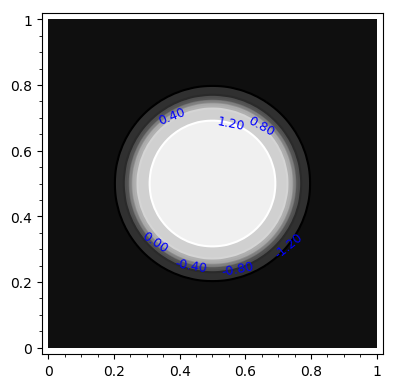

In [28]:
contour_plot(u(eps=1e-4), (x_1, 0,1), (x_2, 0,1), labels=True)

In [26]:
plot3d(u(eps=1e-4), (x_1, 0,1), (x_2, 0,1))

Graphics3d Object